<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [2]:
##### Your Code Here #####

from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [3]:
type(boston_housing)

module

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
X_train_scaled.shape

(404, 13)

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()

n_features = 13

model.add(Dense(13, input_dim=n_features))
model.add(Dense(20, activation="relu"))
model.add(Dense(1, activation="linear"))

model.compile(loss="mean_absolute_error", optimizer="adam", metrics=["mae"])

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

nn_callback = EarlyStopping(monitor="mae", patience=5)

model.fit(X_train_scaled, y_train, epochs=9999, validation_data=(X_test_scaled, y_test), callbacks=[nn_callback])

Epoch 1/9999
13/13 [==============================] - 0s 15ms/step - loss: 22.0734 - mae: 22.0734 - val_loss: 22.4008 - val_mae: 22.4008
Epoch 2/9999
13/13 [==============================] - 0s 4ms/step - loss: 21.4823 - mae: 21.4823 - val_loss: 21.8139 - val_mae: 21.8139
Epoch 3/9999
13/13 [==============================] - 0s 4ms/step - loss: 20.8724 - mae: 20.8724 - val_loss: 21.1369 - val_mae: 21.1369
Epoch 4/9999
13/13 [==============================] - 0s 4ms/step - loss: 20.1376 - mae: 20.1376 - val_loss: 20.2793 - val_mae: 20.2793
Epoch 5/9999
13/13 [==============================] - 0s 4ms/step - loss: 19.1936 - mae: 19.1936 - val_loss: 19.1852 - val_mae: 19.1852
Epoch 6/9999
13/13 [==============================] - 0s 4ms/step - loss: 17.9995 - mae: 17.9995 - val_loss: 17.8254 - val_mae: 17.8254
Epoch 7/9999
13/13 [==============================] - 0s 4ms/step - loss: 16.5241 - mae: 16.5241 - val_loss: 16.2332 - val_mae: 16.2332
Epoch 8/9999
13/13 [===========================

In [9]:
y_pred = model.predict(X_test_scaled)

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

RMSE: 4.59069353367891
MAE: 3.170899804433187
R2: 0.7468345409913544


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [11]:
from tensorflow.keras.datasets import fashion_mnist

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [12]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [13]:
y_test.shape

(10000,)

In [14]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm

model = Sequential()


stop = EarlyStopping(monitor='val_accuracy', patience=8)

n_features = 784

model.add(Flatten())
model.add(Dense(200, input_dim=n_features))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(x_train_scaled, y_train, epochs=9999, validation_data=(x_test_scaled, y_test), callbacks=[stop])

Epoch 1/9999
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4957 - accuracy: 0.8225 - val_loss: 0.4586 - val_accuracy: 0.8327
Epoch 2/9999
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3810 - accuracy: 0.8616 - val_loss: 0.4657 - val_accuracy: 0.8414
Epoch 3/9999
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3524 - accuracy: 0.8703 - val_loss: 0.4175 - val_accuracy: 0.8530
Epoch 4/9999
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3290 - accuracy: 0.8788 - val_loss: 0.3907 - val_accuracy: 0.8601
Epoch 5/9999
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3140 - accuracy: 0.8833 - val_loss: 0.4026 - val_accuracy: 0.8607
Epoch 6/9999
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3033 - accuracy: 0.8876 - val_loss: 0.3652 - val_accuracy: 0.8749
Epoch 7/9999
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2909 - accuracy: 0.8920 - val_loss: 0.4041 -

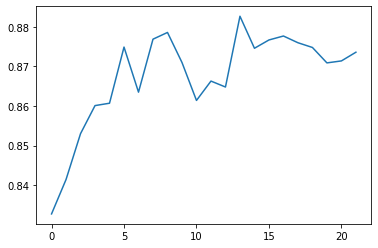

In [16]:
import matplotlib.pyplot as plt

loss_per_epoch = model.history.history['val_accuracy']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch);

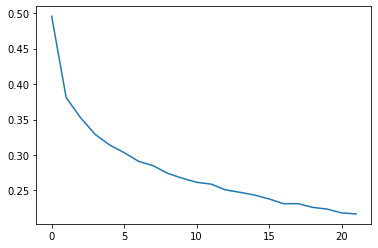

In [17]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch);

In [18]:
x_train_scaled.shape

(60000, 28, 28)

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.